# Progettare con il luogo delle radici

Il luogo delle radici è un metodo grafico utilizzato per analizzare come le radici (poli) dell'equazione caratteristica di un sistema cambiano al variare di un parametro, in genere il guadagno del controller ($K$). Ci aiuta a capire come la stabilità del sistema e la risposta transitoria dipendono dal guadagno di controllo.

Molti sistemi di controllo industriale sono progettati utilizzando l'approccio del luogo delle radici o l'approccio del dominio della frequenza (basato sui grafici di Bode). Questi metodi garantiscono che il sistema soddisfi i requisiti prestazionali.

## Esempio di problema

Consideriamo un esempio per applicare il metodo del luogo delle radici. Disponiamo di un impianto con la funzione di trasferimento:

$$
G(s) = \frac{5}{s(\frac{1}{6}s+1)(0,5s + 1} = \frac{60K_A}{s(s+2)(s+6)}
$$

Questo modello di impianto rappresenta un servosistema motore, dove l'uscita è la posizione e l'ingresso è il segnale manipolato.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_1.png?1" alt="23_Design_with_the_root_locus_example_1" style="width:550px;"/>
    </td>
</tr>
</table>


Come al solito, la prima cosa che vorremmo capire è se un guadagno del controller può risolvere il nostro problema.

#### Precisione in stato stazionario e requisiti transitori

La nostra strategia di progettazione consiste nel soddisfare innanzitutto i requisiti di prestazioni transitorie e di precisione in stato stazionario, quindi verificare la robustezza e la reiezione ai disturbi.

Ricordare che i requisiti transitori includono stabilità relativa e velocità di risposta.
- La stabilità relativa è correlata al superamento del picco, che può essere specificato utilizzando il rapporto di smorzamento ($\zeta$) o il superamento percentuale ($M_p$).
- La velocità di risposta può essere specificata utilizzando il tempo di assestamento ($t_s$), il tempo di salita ($t_r$) o la frequenza naturale ($\omega_n$).

Nel contesto dei sistemi di secondo ordine, è importante ricordarsi di verificare la **'condizione di dominanza.'** Questa condizione garantisce che le caratteristiche principali di un sistema siano governate dai suoi poli dominanti. Se la condizione di dominanza è soddisfatta, bene! Tuttavia, in caso contrario, dobbiamo affrontare l’influenza degli altri poli, come i terzi poli, sulle prestazioni del sistema. Questo è un aspetto cruciale da considerare quando si affronta un problema di progettazione.


**Requisiti**
- Precisione a regime: $K_v \ge 5 $ o $e_{ss} \le 0,2$

Nella progettazione dei sistemi di controllo, spesso ci concentriamo sulla precisione in condizioni stazionarie. Per un sistema di tipo 1 come il nostro, l'errore di stato stazionario su un ingresso passo è zero. Pertanto, specifichiamo la precisione in stato stazionario in termini di costante di errore di velocità, $K_v$. In questo esempio, vogliamo che $K_v$ sia maggiore o uguale a 5.

Per soddisfare il requisito di precisione in stato stazionario, dobbiamo selezionare un guadagno appropriato, $K_A$. Dato che vorremmo concentrarci su una pura regolazione del guadagno e disponiamo di un sistema di tipo 1, la costante di accelerazione è sempre $K_a=0$ e l'errore di stato stazionario rispetto agli ingressi parabolici è infinito. Il sistema non sarà in grado di seguire gli input di accelerazione.

Si noti inoltre che questa discussione significa che per questo sistema qualsiasi requisito di stato stazionario deve essere specificato in termini di precisione per gli ingressi a rampa. È l’unico input che ha senso analizzare. Se ci limitiamo a selezionare un guadagno puro, l'errore al passo è sempre zero; l'errore sulla rampa è sempre infinito.


### Analisi del luogo delle radici

La prima cosa da fare è mettere la funzione di trasferimento nella forma del luogo delle radici. In questo caso:

$$
G(s) = \frac{60K_A}{s(s+2)(s+6)} = \frac{K}{s(s+2)(s+6)}
$$

dove $K=60K_A$ è il guadagno del luogo delle radici.


In questo caso, possiamo calcolare $K_v$:

$$
K_v = \lim_{s\rightarrow0} s \frac{60K_A}{s(s+2)(s+6)} = 5K_A
$$

e il nostro requisito è soddisfatto per $K_A=1$, e quindi è soddisfatto per un guadagno del luogo delle radici $K=60$.


- Possiamo tracciare un grafico approssimativo del luogo delle radici e localizzare i poli quando $K=60$ applicando la condizione di magnitudo.



<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_2.png?1" alt="23_Design_with_the_root_locus_example_2" style="width:550px;"/>
    </td>
</tr>
</table>



- Dalla posizione dei poli dell'anello chiuso possiamo determinare l'angolo di smorzamento $\theta$ e il rapporto di smorzamento $\zeta=\cos(\theta) = 0,105$.

- Possiamo anche ottenere il corrispondente $\omega_n = 2,85$


#### Tempo di assestamento
Un parametro chiave per valutare le prestazioni transitorie è il tempo di assestamento ($t_s$). Il tempo di assestamento rappresenta la velocità con cui il sistema raggiunge uno stato stazionario dopo un disturbo o un cambiamento nell'input. Viene tipicamente definito rispetto ad una fascia di tolleranza del 2% attorno al valore finale.

La formula per calcolare il tempo di assestamento è:

$$
t_s = \frac{4}{\zeta \cdot \omega_n} = 13,36\;\;sec
$$

dove $\zeta$ è il rapporto di smorzamento e $\omega_n$ è la frequenza naturale. Possiamo calcolare facilmente $t_s$ se conosciamo $\zeta$ e $\omega_n$.


#### Condizione di dominanza

Nella progettazione del sistema di controllo, miriamo alla stabilità e alla risposta transitoria soddisfacente. La condizione di dominanza ci aiuta a determinare se possiamo trascurare alcuni poli del sistema.

La condizione di dominanza afferma che se i poli complessi coniugati che governano la risposta transitoria sono significativamente più a sinistra sull’asse reale rispetto agli altri poli, possiamo ignorare questi ultimi. Questa semplificazione ci permette di concentrarci sui poli dominanti nell’analisi delle prestazioni transitorie.

Nel nostro caso, le caratteristiche specifiche della risposta transitoria hanno senso solo se abbiamo una coppia di poli dominanti.
In questo caso però la condizione di dominanza è certamente verificata. I due anelli chiusi sono con parte reale minore di uno e il terzo polo si allontana da -6 verso $-\infty$. Se così non fosse, avremmo localizzato il terzo polo utilizzando la condizione di magnitudo e verificato esplicitamente la condizione di dominanza.


Si noti che la stabilità relativa è piuttosto scarsa, il sistema oscilla ed è molto lento. Con un semplice amplificatore non saremo in grado di soddisfare i requisiti transitori rispettando contemporaneamente la precisione a regime.

### Soddisfare i requisiti temporanei

Consideriamo un esempio in cui l'utente specifica i requisiti transitori:

- Rapporto di smorzamento ($\zeta$) pari a 0,6
- Tempo di assestamento ($t_s$) inferiore o uguale a 4 secondi

#### 1. Trovare i poli dominanti

Per soddisfare i requisiti transitori, dobbiamo individuare i poli dominanti. Iniziamo impostando $\zeta$ su 0,6. Ricorda che se ci concentriamo sull'utilizzo di un guadagno semplice, abbiamo solo un grado di libertà e quindi dobbiamo scegliere il parametro specifico con cui vogliamo iniziare.

Per tentativi ed errori, individuiamo un punto sul diagramma del luogo delle radici che soddisfa sia il criterio dell'angolo che il requisito $\zeta$. Questo punto rappresenta i poli dominanti.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_3.png?1" alt="23_Design_with_the_root_locus_example_3" style="width:550px;"/>
    </td>
</tr>
</table>

#### 2. Valutazione del tempo di assestamento

Trovati i poli dominanti possiamo calcolare il tempo di assestamento utilizzando la formula citata in precedenza. Per il modello in questione, il tempo di assestamento è di circa 5,3 secondi:

$$
t_s = 5,3
$$

È superiore a 4s ma potenzialmente non troppo lontano..


Se partissimo dai requisiti del tempo di assestamento dovremmo considerare qual è la linea verticale sul grafico del luogo delle radici che soddisfa i requisiti del tempo di assestamento.

Dato $t_s$ possiamo calcolare il corrispondente $\zeta\omega_n$.

Tieni presente che, come al solito con i nostri grafici approssimativi, il punto specifico che scegliamo potrebbe non trovarsi esattamente sul grafico del luogo delle radici e dobbiamo riadattare la trama con tentativi ed errori (muovendoci lungo la linea $t_s$ con i nostri punti di prova ) finché non avremo perfezionato il grafico secondo necessità (il punto soddisfa la condizione dell'angolo) e trovato il punto corretto corrispondente ai poli del circuito chiuso desiderati.


Si calcola poi il corrispondente $\zeta$ e si verifica se questo è accettabile rispetto ai requisiti.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_4.png?1" alt="23_Design_with_the_root_locus_example_4" style="width:550px;"/>
    </td>
</tr>
</table>

#### 3. Calcolo del guadagno del luogo delle radici $K$

Dato il punto specifico selezionato, applichiamo la condizione di magnitudo per calcolare il guadagno del luogo delle radici, che in questo caso $K=10,5$, e il corrispondente $K_A = 10,5/60$.

#### 4. Precisione allo stato stazionario

Per garantire che il sistema raggiunga il valore finale desiderato senza errori, utilizziamo la costante di errore di velocità ($K_v$).

La formula per calcolare $K_v$ è:

$$
K_v = \lim_{s \to 0} s \cdot G(s) = \frac{10,5}{12} = 0,825
$$

Con un errore a regime di $e_{ss} = 1,14$ rad.

L'errore di stato stazionario è troppo elevato per soddisfare le nostre specifiche.

**Purtroppo un semplice guadagno non può soddisfare le nostre esigenze.**

### 2.5 Rivalutazione dei requisiti di progettazione

Il rapporto di smorzamento determina quanto oscillatoria sarà la risposta del sistema. Un $\zeta$ più basso porta ad una risposta più oscillatoria, mentre un $\zeta$ più alto porta ad un sistema più smorzato.


Spesso ci troviamo di fronte a un compromesso nella progettazione del sistema di controllo tra la risposta transitoria (la rapidità con cui il sistema risponde ai cambiamenti) e l'accuratezza dello stato stazionario (la precisione con cui il sistema mantiene il suo output nel tempo).


Consideratelo come la messa a punto delle sospensioni di un'auto: troppo rigide (ζ alto) e non abbastanza reattive; troppo morbido (ζ basso) e oscilla troppo.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_5.png?1" alt="23_Design_with_the_root_locus_example_5" style="width:550px;"/>
    </td>
</tr>
</table>


_Figura: Per $\zeta = 0,15$ (K = 60), le radici complesse si trovano in un punto specifico del grafico e si muovono man mano che modifichiamo il guadagno._

### Presentazione dello zero nel sistema

Come progettisti di sistemi di controllo, ci troviamo di fronte a un compromesso tra prestazioni transitorie e stazionarie. Introducendo uno zero nel sistema, possiamo regolare il luogo delle radici per soddisfare i requisiti transitori. Tuttavia, ciò potrebbe influire sulla precisione dello stato stazionario. Dobbiamo rivalutare attentamente le esigenze dell'utente e comunicargli i compromessi.

Per trovare un equilibrio tra prestazioni transitorie e stazionarie, introduciamo uno zero nella funzione di trasferimento del sistema a $s = -3$. Questo zero ha un effetto stabilizzante e influenza il grafico del luogo delle radici.

Introducendo uno zero in s = -3 modifichiamo la dinamica del sistema. Ciò può aiutare a bilanciare i nostri requisiti transitori e stazionari.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_6.png?1" alt="23_Design_with_the_root_locus_example_6" style="width:550px;"/>
    </td>
</tr>
</table>

Il grafico è stato spostato a sinistra e quindi l'aggiunta di uno zero ha stabilizzato il sistema. Il sistema era oscillatorio e aveva proprietà di stabilità relativa molto scarse. L'aggiunta di uno zero migliora la stabilità relativa, è simile ad aumentare lo smorzamento del sistema. L'aggiunta di uno zero può essere pensata come l'aggiunta di un "contrappeso" al nostro sistema che aiuta a regolare la sua risposta dinamica.

Ora disponiamo di un compensatore PD che aggiunge effettivamente uno zero alla funzione di trasferimento del percorso in avanti, migliorando la stabilità e la risposta del sistema.

#### Comprendere l'impatto dell'aggiunta di uno zero

Quando diciamo "la trama è stata spostata a sinistra", ci riferiamo alla trama del luogo delle radici del nostro sistema. Questo spostamento a sinistra è significativo perché:

- **Stabilizzazione del sistema**: nei sistemi di controllo, spostare i poli di un sistema verso sinistra nel piano s (che è ciò che rappresenta il grafico del luogo delle radici) generalmente significa che il sistema sta diventando più stabile.
  
- **Migliorare la stabilità relativa**: originariamente, il nostro sistema era oscillatorio con scarsa stabilità relativa. Pensa alla stabilità relativa come alla capacità del sistema di resistere alle oscillazioni e rimanere stabile in condizioni diverse.

#### Il ruolo di un compensatore PD (proporzionale-derivativo).

- **Che cos'è un compensatore PD?**: Un compensatore PD è un tipo di controller utilizzato nei sistemi di controllo per migliorare la stabilità e la risposta. Regola il segnale di controllo in base all'errore corrente (parte proporzionale) e al tasso di variazione dell'errore (parte derivativa).

- **Effetto di un compensatore PD**: aggiungendo un compensatore PD al nostro sistema, aggiungiamo effettivamente uno zero alla funzione di trasferimento del percorso in avanti. È come aggiungere un contrappeso attentamente calcolato alla nostra barca precedentemente rocciosa, rendendola ora più stabile e reattiva ai cambiamenti.

Un buon modo per illustrare questo concetto è simulare la risposta del sistema con e senza il compensatore PD. Vediamo come diminuiscono le oscillazioni del sistema e migliora la stabilità aggiungendo il compensatore.

Ora scriviamo il codice Python. Simuleremo due sistemi: uno senza compensatore PD e uno con esso.

### Codice Python per confrontare i sistemi

Per dimostrare come le oscillazioni di un sistema diminuiscono e la sua stabilità migliora quando viene aggiunto un compensatore PD, rispetto ad un controllore proporzionale, utilizzeremo Python. Considereremo due casi: uno con regolatore proporzionale e l'altro con regolatore PD.

Per prima cosa definiamo il sistema e i controller:

1. **Sistema Originale (Controllore Proporzionale)**:
   $$ G(s) = \frac{K}{s(s+2)(s+6)} $$
   Per questo esempio, supponiamo \( K = 60K_A \). Il valore esatto di \( K_A \) non è specificato, quindi sceglieremo un valore che dimostri il comportamento del sistema.

2. **Sistema con controller PD**:
   $$ G(s) = \frac{16(s+3)}{s(s+2)(s+6)} $$
   Qui, lo zero in \( s = -3 \) rappresenta l'azione derivativa del controller PD.

Entrambi i sistemi saranno in una configurazione con feedback unitario. Utilizzeremo le librerie Python `matplotlib` per tracciare e "control" per l'analisi del sistema di controllo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

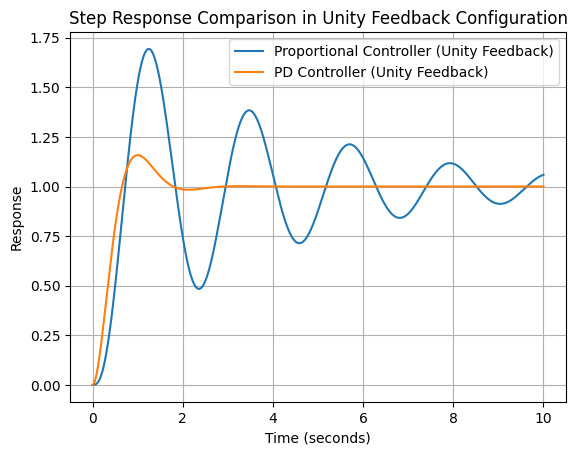

In [ ]:
# Define the transfer function of the original system (Proportional Controller)
K = 60  # Assuming a value for K
G_proportional = ctl.TransferFunction(K, [1, 8, 12, 0])

# Define the transfer function of the system with PD Controller
G_PD = ctl.TransferFunction([16, 48], [1, 8, 12, 0])

# Creating unity feedback loop for both systems
H = ctl.TransferFunction([1], [1])  # Unity feedback
closed_loop_proportional = ctl.feedback(G_proportional, H)
closed_loop_PD = ctl.feedback(G_PD, H)

# Time vector for simulation
time = np.linspace(0, 10, 1000)

# Step response for the Proportional Controller with unity feedback
t1, y1 = ctl.step_response(closed_loop_proportional, time)

# Step response for the PD Controller with unity feedback
t2, y2 = ctl.step_response(closed_loop_PD, time)

# Plotting
plt.figure()
plt.plot(t1, y1, label='Proportional Controller (Unity Feedback)')
plt.plot(t2, y2, label='PD Controller (Unity Feedback)')
plt.title('Step Response Comparison in Unity Feedback Configuration')
plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

### Risultato previsto

Il grafico generato da questo script mostrerà le risposte al gradino dei due sistemi. Dovresti osservare che:

- Il sistema con regolatore proporzionale può presentare più oscillazioni e una risposta più lenta.
- Il sistema con il controller PD dovrebbe mostrare uno smorzamento migliore (meno oscillazioni) e una stabilizzazione più rapida, grazie allo zero aggiunto a $ s = -3 $.

**Domanda pop-up**: In che modo l'aggiunta di uno zero alla funzione di trasferimento del percorso in avanti di un sistema di controllo influisce sulla sua stabilità?

**Risposta**: L'aggiunta di uno zero in genere migliora la stabilità del sistema rendendolo meno oscillatorio e più resistente ai disturbi, in modo simile all'aumento dello smorzamento del sistema.

Consideriamo ora un requisito $\zeta = 0,6$ e come al solito inseriamolo nel grafico del luogo delle radici.



<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_7.png?1" alt="23_Design_with_the_root_locus_example_7" style="width:550px;"/>
    </td>
</tr>
</table>



La funzione di trasferimento del percorso in avanti diventa:

$$
G(s) = \frac{(s+3)}{s(s+2)(s+6)}
$$

Possiamo quindi calcolare il guadagno al quale otteniamo i poli ad anello chiuso desiderati per ottenere:

$$K = 16$$

E infine il tempo di assestamento:

$$
t_s = \frac{4}{\zeta\omega_n} = 1,96\;\;sec
$$

e la costante di velocità:

$$
K_v = \frac{16\cdot3}{12} = 4
$$

Avevamo un requisito che $K_v \ge 5$ quindi non lo abbiamo raggiunto completamente, ma ora con alcuni tentativi ed errori possiamo ottenere le prestazioni che desideriamo.

**Condizione di dominanza**: il terzo polo si trova ora nella zona compresa tra -6$ e -3$ e sussiste il rischio che la condizione di dominanza venga violata. Se così fosse bisognerebbe mitigare l’effetto di questo polo. Ad esempio, se la distanza non può essere 5 volte, possiamo provare a realizzarla a una distanza pari a tre o quattro volte la posizione dei poli più a destra. In alternativa, invece di progettare per $\zeta=0,6$ puoi progettare per qualche altro valore.

La simulazione sarà utile per comprenderne tutti gli effetti.

Si noti inoltre che se il terzo polo si avvicina abbastanza allo zero, il loro effetto combinato in anello chiuso verrà annullato e il sistema si comporterà come un sistema del secondo ordine. La condizione di dominanza è rispettata.

#### Affrontare il Terzo Polo

Nel nostro sistema abbiamo una situazione in cui il terzo polo si trova nella regione tra -6 e -3. Ciò comporta il rischio che venga violata la condizione di dominanza, per cui questo terzo polo potrebbe influenzare indebitamente il comportamento del sistema.


#### Strategie per mitigare l'effetto del Terzo Polo

1. **Considerazione sulla distanza**: Idealmente, vogliamo che questo terzo polo sia almeno cinque volte più distante dall'asse immaginario dei poli più a destra. Se ciò non è possibile, miriamo a una distanza da tre a quattro volte superiore.

2. **Rettifiche di progettazione**: Se mantenere la distanza desiderata è impegnativo, potremmo riprogettare il sistema per un diverso rapporto di smorzamento ($\zeta$), diverso da 0,6.

3. **Vantaggi della simulazione**: simulare la risposta del sistema con queste variazioni fornirà un quadro più chiaro di come questi cambiamenti influiscono sulle prestazioni.

**Nota per l'istruttore**: *Condurre una simulazione che mostri la risposta del sistema con il terzo polo a diverse distanze dai poli dominanti e dallo zero. Ciò dimostrerà visivamente l'impatto sul comportamento del sistema.*

**LO SCRIPT SOTTO PRESENTA UN ERRORE NEL MODO IN CUI VIENE CALCOLATO L'ERRORE STATO STABILE DELLA RAMPA. AGGIUSTALO**.

In [ ]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# import control as ctl
# from ipywidgets import interact, FloatSlider


# def calculate_settling_time(T, yout, tol=0.02):
#     # Settling time is the time at which the response remains within a certain tolerance
#     settled_value = yout[-1]
#     lower_bound = settled_value * (1 - tol)
#     upper_bound = settled_value * (1 + tol)
#     within_tol = np.where((yout >= lower_bound) & (yout <= upper_bound))[0]
#     if within_tol.size == 0:
#         return np.nan  # Return NaN if the system never settles
#     return T[within_tol[0]]

# def calculate_steady_state_error(system_type, G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     if system_type == 'step':
#         # Steady-state error for step input (Type 0 system)
#         T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
#         steady_state_val = yout[-1]
#         return 1 - steady_state_val
#     elif system_type == 'ramp':
#         # Steady-state error for ramp input (Type 1 system)
#         Kv = ctl.dcgain(G_closed_loop * ctl.TransferFunction([1, 0], [1]))
#         return 1 / Kv if Kv != 0 else np.inf
#     else:
#         return np.nan

# def plot_step_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.step_response(G_closed_loop, T=np.linspace(0, time_span[-1], 500))
#     plt.plot(T, yout)
#     settling_time = calculate_settling_time(T, yout)
#     steady_state_error = calculate_steady_state_error('step', G, K, time_span)
#     plt.title(f'Step Response for Gain K={K}\nSettling Time: {settling_time:.2f}, Steady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)


# def plot_ramp_response(G, K, time_span):
#     G_closed_loop = ctl.feedback(K * G)
#     T, yout = ctl.forced_response(G_closed_loop, T=time_span, U=time_span)
#     plt.plot(T, yout)
#     steady_state_error = calculate_steady_state_error('ramp', G, K, time_span)
#     plt.title(f'Ramp Response for Gain K={K}\nSteady-State Error: {steady_state_error:.2f}')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.grid(True)



# def plot_root_locus_with_gain(K):
#     # Define the transfer function G(s)
#     numerator = [1, 3]
#     denominator = [1, 8, 12, 0]
#     G = ctl.TransferFunction(numerator, denominator)

#     # Calculate the closed-loop transfer function for the given gain
#     G_closed_loop = ctl.feedback(K * G)

#     # Find the poles for the specific gain
#     poles = ctl.pole(G_closed_loop)

#     # Plot the root locus
#     plt.figure(figsize=(10, 6))
#     ctl.root_locus(G, plot=True)

#     # Plot the poles for the specific gain
#     plt.plot(np.real(poles), np.imag(poles), 'ro', markersize=10, label=f'Poles for K={K}')

#     # Enhance plot
#     plt.xlabel('Real Axis')
#     plt.ylabel('Imaginary Axis')
#     plt.title(f'Root Locus of G(s) with Poles for Gain K={K}')
#     plt.grid(True)
#     plt.legend()
#     plt.show()
    
    
# def plot_all(K):
#     # Define the transfer function G(s)
#     numerator = [16, 48]
#     denominator = [1, 8, 12, 0]
#     G = ctl.TransferFunction(numerator, denominator)
    
#     # Time span for the responses
#     time_span = np.linspace(0, 10, 1000)

#     # Plot Root Locus
#     plot_root_locus_with_gain(K)

#     # Plot Step Response
#     plt.figure(figsize=(10, 4))
#     plot_step_response(G, K, time_span)
#     plt.show()

#     # Plot Ramp Response
#     plt.figure(figsize=(10, 4))
#     plot_ramp_response(G, K, time_span)
#     plt.show()
    

# # interact(plot_root_locus_with_gain, 
# #          K=FloatSlider(value=16, min=0, max=50, step=0.5, description='Gain K:'))

# interact(plot_all, 
#          K=FloatSlider(value=16, min=0, max=50, step=0.5, description='Gain K:'))


interactive(children=(FloatSlider(value=16.0, description='Gain K:', max=50.0, step=0.5), Output()), _dom_clas…

<function __main__.plot_all(K)>

#### Cancellazione Polo Zero

- **Avvicinarsi allo zero**: se il terzo polo si avvicina sufficientemente allo zero che abbiamo aggiunto, i loro effetti nel sistema a circuito chiuso possono annullarsi a vicenda. Ciò fa sì che il sistema si comporti come un sistema di secondo ordine, rispettando la condizione di dominanza.

- **Flessibilità di progettazione**: se il terzo polo non è né abbastanza lontano dai poli dominanti né abbastanza vicino allo zero aggiunto, abbiamo ancora una certa flessibilità. Possiamo utilizzare il margine che abbiamo nel tempo di assestamento (il tempo necessario al sistema per stabilizzarsi) per adattare di conseguenza il nostro progetto.

**Domanda pop-up**: Perché è importante rispettare la condizione di dominanza nella progettazione del sistema di controllo?

**Risposta**: Il rispetto della condizione di dominanza garantisce che il sistema si comporti in modo prevedibile e stabile, influenzato principalmente dai poli dominanti, e minimizzi l’impatto di altri poli meno significativi.

### Realizzazione fisica del compensatore

Abbiamo scelto un controller che lo sia

$$ D(s) = s + z_c $$

dove $ z_c $ è lo zero del compensatore, e questo viene aggiunto per migliorarne la risposta ai transitori e la stabilità.


In pratica, i differenziatori puri vengono evitati a causa della loro sensibilità al rumore ad alta frequenza.

Pertanto, questo tipo di compensatori vengono solitamente implementati con un polo aggiuntivo per attenuare le alte frequenze.

La realizzazione pratica di questo compensatore prevede l'aggiunta di un filtro per ridurre l'impatto del rumore ad alta frequenza.

Il compensatore vero e proprio ha la forma:

$$
D(s) = \frac{s + z_c}{s + p_c}
$$

Qui, $ z_c $ è lo zero e $ p_c $ è un polo introdotto per filtrare il rumore ad alta frequenza.

Lo scopo di questo polo non è quello di aiutare con la parte di compensazione, quindi vogliamo che sia lontano dal resto dei nostri poli e zeri. Nel nostro caso ad esempio potremmo posizionarlo a -10 o più lontano. Potrebbe dipendere dalle esigenze realizzative. L’accuratezza numerica potrebbe porre vincoli specifici su quanto lontano può essere.

L’aggiunta di un altro polo modifica il luogo delle radici che diventa:



<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_8.png?1" alt="23_Design_with_the_root_locus_example_8" style="width:550px;"/>
    </td>
</tr>
</table>

L'aggiunta di un altro polo ha un effetto destabilizzante. È necessario scegliere il polo in modo che il luogo delle radici attorno alle nostre esigenze non venga disturbato. Ad esempio, $\zeta=0.6$ continua a trovarsi nel luogo delle radici e $K_v=4$ continua a essere soddisfatto (almeno approssimativamente).

In questo caso le prestazioni finali sono:

$$
\zeta = 0,6
$$

$$
t_s = 3,33\;\; sez
$$

$$
K_v = 1,7
$$

La costante di velocità è ora più scarsa! E quindi abbiamo un errore di stato stazionario più elevato. Potrebbe essere necessario regolare nuovamente il compensatore.

È necessario regolare la coppia zero-polare per ottenere le prestazioni desiderate. Abbiamo un ulteriore grado di libertà.

Nel complesso possiamo cambiare: $z_c$, $p_c$ e $K_A$.

### Compensazione anticipo fase

Questo tipo di controller è chiamato Phase Lead Compensator. Aggiunge un angolo di anticipo. Ciò diventerà più chiaro quando discuteremo della progettazione basata sulla frequenza.

<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_9.png?2" alt="23_Design_with_the_root_locus_example_9" style="width:550px;"/>
    </td>
</tr>
</table>

Questa rete può essere implementata come:

<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_10.png?2" alt="23_Design_with_the_root_locus_example_10" style="width:550px;"/>
    </td>
</tr>
</table>

e la sua funzione di trasferimento è:

$$
D(s) = \frac{-R_F(sR_1C+1)}{sR_1R_2C+R_1R_2}
$$

e possiamo regolare le posizioni del polo e dello zero scegliendo resistori e condensatori in modo appropriato.

La funzione di trasferimento di cui sopra può essere riorganizzata per avere la nostra forma tipica come:

$$
D(s) = \frac{-K_C(\tau s + 1)}{\alpha\tau s + 1}
$$

Dove

- $\tau = R_1C$
- $K_C = \frac{R_F}{R_1+R_2}$
- $\alpha = \frac{R_2}{R_1+R_2}$

## Effetti dell'aggiunta di un polo all'origine

**Impatto sulle dinamiche del sistema**

Il posizionamento di un polo nell'origine influenza in modo significativo sia il comportamento transitorio che quello stazionario del sistema.

### Precisione allo stato stazionario
Quando viene aggiunto un polo all'origine, il numero del tipo del sistema aumenta, il che a sua volta aumenta il guadagno in stato stazionario $ K_v $ all'infinito per un ingresso a rampa. Ciò migliora la precisione dello stato stazionario.

### Risposta transitoria
Tuttavia, l'aggiunta di un polo all'origine può influenzare negativamente la risposta transitoria del sistema, destabilizzando potenzialmente il sistema per tutti i valori del guadagno $ K $.


### Visualizzazione attraverso il luogo delle radici
Per dimostrarlo possiamo disegnare il luogo delle radici del sistema aggiungendo un polo all'origine.
<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_11.png?1" alt="23_Design_with_the_root_locus_example_11" style="width:550px;"/>
    </td>
</tr>
</table>

### Aggiunta di uno zero vicino all'origine

Per recuperare la stabilità dobbiamo tirare il sistema verso sinistra, e per fare questo possiamo aggiungere uno zero vicino all'origine.

Ora il luogo delle radici diventa:

<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_11.png?1" alt="23_Design_with_the_root_locus_example_11" style="width:550px;"/>
    </td>
</tr>
</table>

Ora stiamo utilizzando un controller del modulo:

$$
D(s) = \frac{s+z_c}{z} = 1 + \frac{z_c}{s} = 1 + \frac{1}{T_is}
$$

che è un controller PI.

In [ ]:
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

def get_closed_loop_system(K, z_c, z=1):
    # Open-loop transfer function G(s)
    G = ctl.TransferFunction([K], [1, 8, 12, 0])

    # Compensator D(s)
    D = ctl.TransferFunction([1, z_c], [z, 0])

    # Combined system
    open_loop_system = G * D

    # Closing the loop with unity feedback
    return ctl.feedback(open_loop_system, 1)


def plot_root_locus(K, z_c=1):
    system = get_closed_loop_system(K, z_c)
    plt.figure(figsize=(10, 6))
    ctl.root_locus(system, plot=True)
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title(f'Root Locus with Gain K = {K}')
    plt.grid(True)
    plt.show()

    
interact(plot_root_locus, K=FloatSlider(value=1, min=0, max=100, step=.1, description='Gain K:'))
    

interactive(children=(FloatSlider(value=1.0, description='Gain K:'), IntSlider(value=1, description='z_c', max…

<function __main__.plot_root_locus(K, z_c=1)>

### Approccio pratico: compensatore del ritardo di fase

La progettazione di un compensatore di ritardo di fase prevede un'attenta selezione delle posizioni del polo compensatore e dello zero per bilanciare i requisiti transitori e stazionari.

Se guardiamo indietro alle nostre specifiche originali, non avevamo un requisito specifico per avere $K_v=0$ (il che avrebbe giustificato il posizionamento di un polo all'origine).

Invece di posizionare il polo compensatore esattamente all'origine, posizionarlo vicino all'origine può fornire un design più equilibrato. Questo approccio consente flessibilità nel soddisfare i requisiti di precisione sia in stato stazionario che transitorio.

Il compensatore assume la forma:

$$
D(s) = \frac{ s + z_c }{ s + p_c }
$$


Questo controller fornisce un contributo angolare negativo e per questo motivo è chiamato controller Phase-Lag.


<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_13.png?1" alt="23_Design_with_the_root_locus_example_13" style="width:550px;"/>
    </td>
</tr>
</table>

## Compensatore del ritardo di fase: realizzazione pratica

La realizzazione fisica di un compensatore di ritardo di fase comporta in genere l'utilizzo di resistori e condensatori per creare una rete che imiti la funzione di trasferimento desiderata.

Un tipico compensatore di ritardo di fase può essere realizzato utilizzando un circuito amplificatore operazionale (Op-Amp). La progettazione prevede la selezione di valori appropriati di resistore e condensatore per ottenere i valori $s + z_c $ e $ s + p_c $ desiderati.

<table>
<tr>
    <td>
        <img src="../pics/23_Design_with_the_root_locus_example_14.png?1" alt="23_Design_with_the_root_locus_example_14" style="width:550px;"/>
    </td>
</tr>
</table>